# architecture

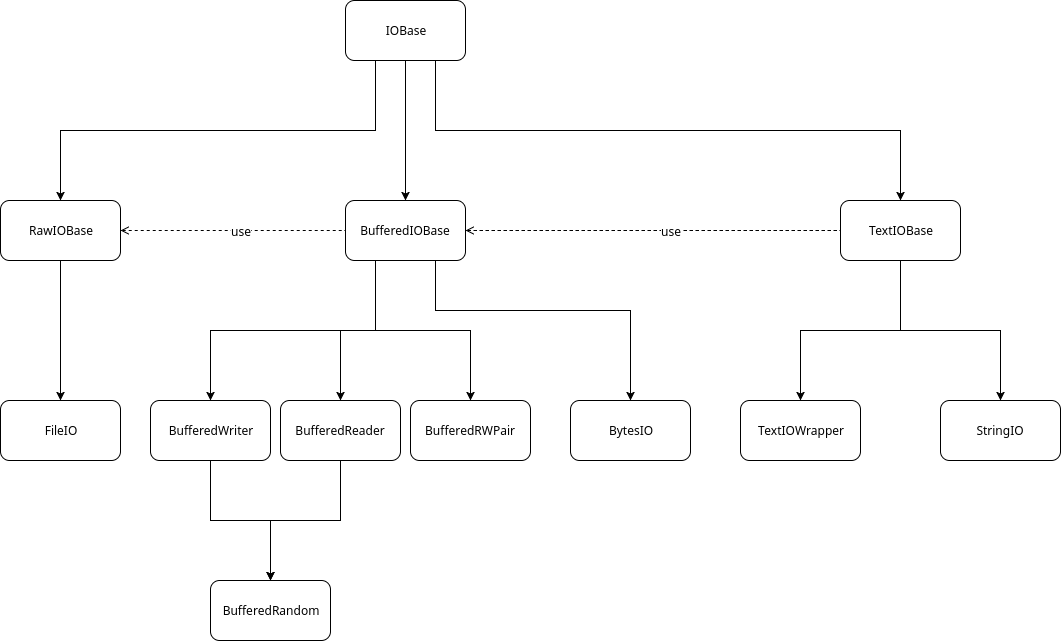

三种类型的 IO: raw IO, buffered IO, text IO.

# raw IO
Raw IO 负责调用 OS syscall 进行底层读写, 并保证每次只调用一次 syscall.
它不提供 buffer, 不提供多余的封装. 读写都是 binary data.

# buffered IO
Buffered IO 也即 binary IO, 它使用 raw IO 进行读写, 在此基础上添加了
buffer 功能. 读写同样也都是 binary data.

注意 buffered IO classes 使用 raw IO classes, 但不是后者的子类.
虽然两者具有相似的 API.
这样是把 raw IO 作为工具来使用, 方便根据需要使用不同的 raw IO 实现.

## in memory
提供了 `BytesIO` in-memory buffer tool.

# text IO
Text IO 使用 raw IO 或 buffered IO 进行读写, 在此基础上实现了
unicode text 和 binary data 之间的转换 (encoding/decoding) 功能.
它读写都是 unicode text.

在 text IO 级别上才有 line buffer 概念. 因为只有 text 有行的
概念. 在 buffered IO 中只能指定 buffer size.

注意 text IO classes 使用 raw IO 或 binary IO classes, 但不是它们的子类.
虽然具有相似的 API. 将 raw IO 或 binary IO 作为工具来使用, 才能方便地
按照需求选择不同的 IO 实现.

## TextIOWrapper

-   当明确使用 TextIOWrapper (而不是通过 ``open()`` 自动返回时), 往往用于 wrap
    一个 existing binary/raw IO object, 从而能够在要求 text mode file-like
    object 的场景下使用. 被 wrapped 的对象一般实现了 (至少一部分)
    BufferedIOBase API (但不一定是它的实例).

## in memory
`StringIO` in-memory buffer tool.

Constructor parameters.

-   `initial_value` 用于设置 buffer 的初始值. 这个初始值的设置是为了便于
    接下来对它进行修改. 相当于一个文件以 "r+" mode 打开. fd 指向 buffer
    起始位置. 此时 `write()` 会覆盖掉 `initial_value` 的部分.

## 关于 unbuffered text IO
`io.open()` 不允许 unbuffered text IO object. 即 python3 中, 绝大部分情况下
text IO 不能是 unbuffered. 这是因为 text 和 binary data 的相互转换需要以一定的
buffer 为前提来实现. 若需要 unbuffered text IO, 有两种办法:

-   需要在必要的地方 flush buffer, 来模拟 unbuffered 行为.
-   手动构建 unbuffered text IO object `TextIOWrapper(FileIO(...))`.
    这样构建的 text IO object 基本上是 unbuffered, 但由于编码解码, 仍然要使用
    相应的 buffer. 但实际影响已经可以忽略. python 解释器的 `-u` flag, 设置的
    stdout/stderr stream 就是这样的 unbuffered text IO stream.

# opener
`io.open()` 根据参数不同给出不同的 IO 模式实例.
-   write, text, with buffer: `TextIOWrapper`, with `BufferedWriter`.
-   read, text, with buffer: `TextIOWrapper`, with `BufferedReader`.
-   read/write, text, with buffer: `TextIOWrapper`, with `BufferedRandom`.
-   write, bytes, with buffer: `BufferedWriter`.
-   read, bytes, with buffer: `BufferedReader`.
-   read/write, bytes, with buffer: `bufferedRandom`.
-   write or read, bytes, without buffer: `FileIO`.

